# [Moving Average](https://en.wikipedia.org/wiki/Moving_average)

In [1]:
import torchaudio
import noisereduce as nr
from torchaudio.functional import *
import torch as tr
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Joseph\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def moving_average(samples, window_size):
    # samples: (..., time)
    y = []
    for j in range(samples.shape[0]): # for each sensor
        for i in range(-window_size//2, window_size//2): # For these time displacements
            y.append(tr.roll(samples[j], i, dims=0)) # Append each time displacement
    return tr.mean(tr.row_stack(y), dim=0, keepdim=True) # Take the average of all sensors and time displacements

x = tr.rand((3, 100)) * .3
x += tr.rand((1,100))
x -= tr.mean(x, dim=1, keepdim=True)

y = moving_average(x, 5)
y_avg = tr.mean(x, dim=0)

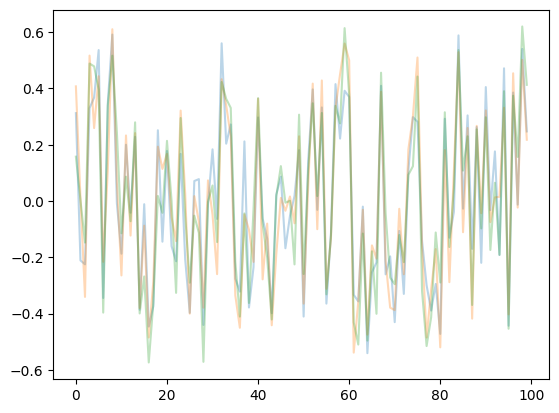

In [3]:
for x_ in x:
    plt.plot(x_, alpha=.3)
# plt.plot(y_avg, c='k', linewidth=2)
_ = plt.plot(y, linewidth=2)

In [4]:
x1, sr = torchaudio.load('../data/sensor_1.wav')
x2, sr = torchaudio.load('../data/sensor_2.wav')
x3, sr = torchaudio.load('../data/sensor_3.wav')
X = tr.concat([x1, x2, x3], dim=0)

N = len(x1[0])
n = 3
tt = np.arange(N) / sr
ii = np.linspace(0, N, n, dtype=np.int32)

In [5]:
filtered_waveform = moving_average(X, 5)

rms = lambda x: tr.sqrt(tr.mean(x**2))
filtered_waveform = torchaudio.transforms.Vol(-25, 'db')(filtered_waveform  / rms(filtered_waveform))

torchaudio.save('output.wav', filtered_waveform, sr, encoding="PCM_S", bits_per_sample=32)

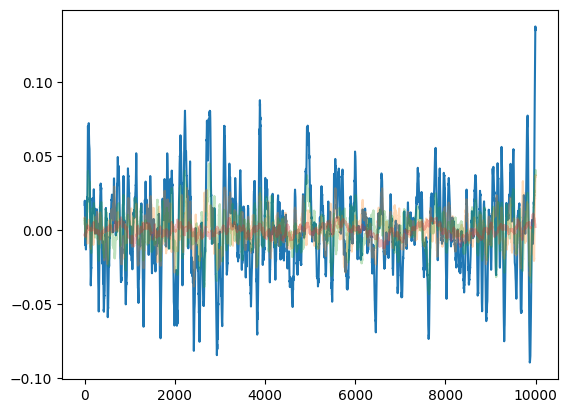

In [6]:
plt.plot(filtered_waveform[0, :10000])
plt.plot(X[0, :10000], alpha=.3)
plt.plot(X[1, :10000], alpha=.3)
plt.plot(X[2, :10000], alpha=.3)